In [140]:
from decouple import config
import tweepy
import basilica
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import matplotlib
import matplotlib.cbook as cb
from matplotlib.colors import colorConverter, Colormap
from matplotlib.collections import LineCollection
import numpy
import networkx.drawing
from networkx.drawing import nx_pylab

#import dash
#import dash_cytoscape as cyto
#import dash_html_components as html

#Import Keys
TWITTER_AUTH = tweepy.OAuthHandler(
    config('TWITTER_CONSUMER_KEY'),
    config('TWITTER_CONSUMER_SECRET'))
TWITTER_AUTH.set_access_token(
    config('TWITTER_ACCESS_TOKEN'),
    config('TWITTER_ACCESS_TOKEN_SECRET'))
TWITTER = tweepy.API(TWITTER_AUTH)
BASILICA = basilica.Connection(config('BASILICA_KEY'))

In [141]:
# Create user object

user_1 = TWITTER.get_user('matt42kirby')

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [142]:
user_2 = TWITTER.get_user("itsamececily")

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [136]:
def create_follower_graph(user):
    # Fetch follower ids
    followers = user.followers_ids()[:20]

    # Create dict with follower ids and screen names
    follower_dict = {follower: TWITTER.get_user(follower).screen_name for follower in followers}
    
    # Initialize Graph
    user_graph = nx.DiGraph()

    # Add nodes for followers
    user_graph.add_nodes_from(follower_dict)

    # Add follower edges
    for i in list(follower_dict.keys()):
        user_graph.add_edge(i, user.id)
        
    return user_graph

In [137]:
graph_1 = create_follower_graph(user_1)
graph_2 = create_follower_graph(user_2)

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [138]:
def get_html_elements(user_graph):
    pos = nx.random_layout(user_graph)
    elements =  []

    # Insert nodes
    for node in pos:
        elements.append({"data":{
                                "id": str(node), "label": str(node)},
                            "position": {
                                "x": float(pos[node][0]), "y": float(pos[node][1])}})

    # Insert edges
    for edge in user_graph.edges():
        elements.append({"data": {"source": str(edge[0]), "target": str(edge[1])}})
        
    return elements

In [139]:
elements = get_html_elements(graph_1) + get_html_elements(graph_2)

NameError: name 'graph_1' is not defined

In [10]:
G = user_graph

In [91]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]][0], pos[edge[0]][1]
    x1, y1 = pos[edge[1]][0], pos[edge[1]][1]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [92]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node][0], pos[node][1]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [93]:
#d = dict(TWITTER.rate_limit_status())
#d

In [94]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

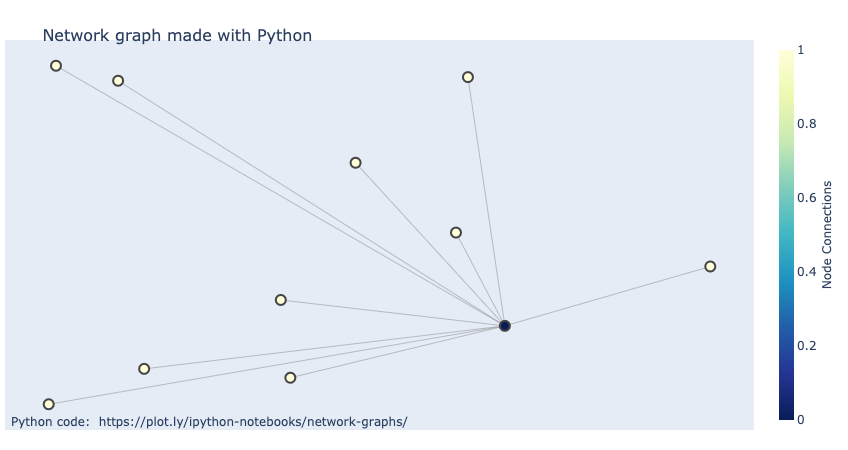

In [95]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [96]:
[
            {'data': {'id': 'one', 'label': 'Node 1'}, 'position': {'x': 75, 'y': 75}},
            {'data': {'id': 'two', 'label': 'Node 2'}, 'position': {'x': 200, 'y': 200}},
            {'data': {'source': 'one', 'target': 'two'}}
        ]

[{'data': {'id': 'one', 'label': 'Node 1'}, 'position': {'x': 75, 'y': 75}},
 {'data': {'id': 'two', 'label': 'Node 2'}, 'position': {'x': 200, 'y': 200}},
 {'data': {'source': 'one', 'target': 'two'}}]

In [97]:
pos

{4186830016: array([0.2144361 , 0.16857429], dtype=float32),
 1046903019772760064: array([0.39214367, 0.35108685], dtype=float32),
 1196282874170937344: array([0.09978186, 0.97147334], dtype=float32),
 926150184890859520: array([0.6355556, 0.9414101], dtype=float32),
 1221530842494906368: array([0.95076865, 0.43974093], dtype=float32),
 1063813809301794816: array([0.6199882 , 0.52951956], dtype=float32),
 144231081: array([0.48941773, 0.71450424], dtype=float32),
 1131194479065542656: array([0.40458146, 0.1450478 ], dtype=float32),
 25582250: array([0.1805646, 0.9317526], dtype=float32),
 262501819: array([0.090285 , 0.0748245], dtype=float32),
 219574192: array([0.68360084, 0.2824506 ], dtype=float32)}

In [ ]:

[
# Node
{"data": {"id": user_id, "label": user_id}, "position": {"x": pos[user_id][0], "y": pos[user_id][1]}},
# Edge
{'data': {'source': edge[0], 'target': edge[1]}}
]

In [107]:
for edge in user_graph.edges():
      print(edge[0], edge[1])

4186830016 219574192
1046903019772760064 219574192
1196282874170937344 219574192
926150184890859520 219574192
1221530842494906368 219574192
1063813809301794816 219574192
144231081 219574192
1131194479065542656 219574192
25582250 219574192
262501819 219574192


In [120]:
elements =  []

# Insert nodes
for node in pos:
    elements.append({"data":{
                            "id": str(node), "label": str(node)},
                        "position": {
                            "x": float(pos[node][0]), "y": float(pos[node][1])}})

# Insert edges
for edge in user_graph.edges():
    elements.append({"data": {"source": str(edge[0]), "target": str(edge[1])}})

In [122]:
user.id

219574192

In [207]:
double_edges = [
    {'data': {'id': src+tgt, 'source': src, 'target': tgt}}
    for src, tgt in ['AB', 'BA', 'BC', 'CB', 'CD', 'DC', 'DA', 'AD']
]

double_edged_el = [{'data': {'id': id_}} for id_ in 'ABCD'] + double_edges

In [208]:
double_edged_el

[{'data': {'id': 'A'}},
 {'data': {'id': 'B'}},
 {'data': {'id': 'C'}},
 {'data': {'id': 'D'}},
 {'data': {'id': 'AB', 'source': 'A', 'target': 'B'}},
 {'data': {'id': 'BA', 'source': 'B', 'target': 'A'}},
 {'data': {'id': 'BC', 'source': 'B', 'target': 'C'}},
 {'data': {'id': 'CB', 'source': 'C', 'target': 'B'}},
 {'data': {'id': 'CD', 'source': 'C', 'target': 'D'}},
 {'data': {'id': 'DC', 'source': 'D', 'target': 'C'}},
 {'data': {'id': 'DA', 'source': 'D', 'target': 'A'}},
 {'data': {'id': 'AD', 'source': 'A', 'target': 'D'}}]

In [ ]:
double_edges

In [201]:
import numpy as np

# Make a random graph
user_1 = 2580
user_2 = 3495
user_3 = 5087
user_4 = 4242


user_1_friends = range(30)
user_2_friends = range(20, 70)
user_3_friends = range(50, 80)
user_4_friends = range(90, 103)

#x = tweet frequency per day or week
tweet_freq = range(0, 20)
#y = follower count
followers = range(300, 20000)

elements =  []


# Add user 1, 2, 3, and 4
users = [user_1, user_2, user_3, user_4]
for user in users:
    elements.append({
        "data":{
            "id": str(user), "label": str(user)
        }, 
        "position": {
            "x": float(np.random.choice(tweet_freq)), "y": float(np.random.choice(followers))
        }, 'classes': 'red'
    })

print(elements)

# Connect users
# 1 & 2
elements.append({"data": {"source": str(user_1), "target": str(user_2)}, 'classes': 'red'})
elements.append({"data": {"source": str(user_2), "target": str(user_1)}, 'classes': 'red'})

# 2 & 3
elements.append({"data": {"source": str(user_2), "target": str(user_3)}, 'classes': 'red'})
elements.append({"data": {"source": str(user_3), "target": str(user_2)}, 'classes': 'red'})

# 4 & 1
elements.append({"data": {"source": str(user_4), "target": str(user_1)}, 'classes': 'red'})
elements.append({"data": {"source": str(user_1), "target": str(user_4)}, 'classes': 'red'})

#1 & 3
elements.append({"data": {"source": str(user_1), "target": str(user_3)}, 'classes': 'red'})
elements.append({"data": {"source": str(user_3), "target": str(user_1)}, 'classes': 'red'})

#1 & 4
elements.append({"data": {"source": str(user_1), "target": str(user_4)}, 'classes': 'red'})
elements.append({"data": {"source": str(user_4), "target": str(user_1)}, 'classes': 'red'})

print(elements)



def sample_element_gen(user, friends):
    print(user, len(friends))
    user_pos = {}
    
    for i in friends:
        user_pos[str(i)] = [float(np.random.choice(tweet_freq)), float(np.random.choice(followers))]
        
    user_edges = []
    
    for i in friends:
        user_edges.append((str(i), str(user)))
    
    ele = []
    
    # Insert edges
    for edge in user_edges:
        ele.append({"data": {"source": str(edge[0]), "target": str(edge[1])}})


    # Insert nodes
    for node in user_pos:
        ele.append({"data":{
                                "id": str(node), "label": str(node)},
                            "position": {
                                "x": float(user_pos[node][0]), "y": float(user_pos[node][1])}})
        
    return ele

elements = elements + sample_element_gen(user_1, user_1_friends)
elements = elements + sample_element_gen(user_2, user_2_friends)
elements = elements + sample_element_gen(user_3, user_3_friends)
elements = elements + sample_element_gen(user_4, user_4_friends)

[{'data': {'id': '2580', 'label': '2580'}, 'position': {'x': 18.0, 'y': 1546.0}, 'classes': 'red triangle'}, {'data': {'id': '3495', 'label': '3495'}, 'position': {'x': 6.0, 'y': 831.0}, 'classes': 'red triangle'}, {'data': {'id': '5087', 'label': '5087'}, 'position': {'x': 11.0, 'y': 2157.0}, 'classes': 'red triangle'}, {'data': {'id': '4242', 'label': '4242'}, 'position': {'x': 2.0, 'y': 12973.0}, 'classes': 'red triangle'}]
[{'data': {'id': '2580', 'label': '2580'}, 'position': {'x': 18.0, 'y': 1546.0}, 'classes': 'red triangle'}, {'data': {'id': '3495', 'label': '3495'}, 'position': {'x': 6.0, 'y': 831.0}, 'classes': 'red triangle'}, {'data': {'id': '5087', 'label': '5087'}, 'position': {'x': 11.0, 'y': 2157.0}, 'classes': 'red triangle'}, {'data': {'id': '4242', 'label': '4242'}, 'position': {'x': 2.0, 'y': 12973.0}, 'classes': 'red triangle'}, {'data': {'source': '2580', 'target': '3495'}, 'classes': 'red'}, {'data': {'source': '3495', 'target': '2580'}, 'classes': 'red'}, {'data

In [202]:
elements[:-30]

[{'data': {'id': '2580', 'label': '2580'},
  'position': {'x': 18.0, 'y': 1546.0},
  'classes': 'red triangle'},
 {'data': {'id': '3495', 'label': '3495'},
  'position': {'x': 6.0, 'y': 831.0},
  'classes': 'red triangle'},
 {'data': {'id': '5087', 'label': '5087'},
  'position': {'x': 11.0, 'y': 2157.0},
  'classes': 'red triangle'},
 {'data': {'id': '4242', 'label': '4242'},
  'position': {'x': 2.0, 'y': 12973.0},
  'classes': 'red triangle'},
 {'data': {'source': '2580', 'target': '3495'}, 'classes': 'red'},
 {'data': {'source': '3495', 'target': '2580'}, 'classes': 'red'},
 {'data': {'source': '3495', 'target': '5087'}, 'classes': 'red'},
 {'data': {'source': '5087', 'target': '3495'}, 'classes': 'red'},
 {'data': {'source': '4242', 'target': '2580'}, 'classes': 'red'},
 {'data': {'source': '2580', 'target': '4242'}, 'classes': 'red'},
 {'data': {'source': '2580', 'target': '5087'}, 'classes': 'red'},
 {'data': {'source': '5087', 'target': '2580'}, 'classes': 'red'},
 {'data': {'so

In [203]:
len(elements)

260

In [205]:
import  pickle


pickleFile = open("pickle.txt", 'wb')
pickle.dump(elements, pickleFile)
pickleFile.close()

In [ ]:
#https://dash.plot.ly/cytoscape/layout

In [ ]:
# can also use profile pics as nodes
#https://dash.plot.ly/cytoscape/styling